# Network Analytics

In this notebook, we will use diverse data based on networks from [SNAP](https://snap.stanford.edu/data/index.html) to make some network analysis. We will:
* Use [Netwokx](https://networkx.github.io/documentation/networkx-1.9/index.html) library to do retrieve graph properties
* Use the different methods to manipulate a graph
* Use methods of centrality reviewed in graph theory
* Create basic network plots

In [40]:
#!pip install networkx

In [41]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

## Graph Essentials

In [42]:
g = nx.Graph()

In [43]:
# One node at a time
g.add_node(1)

In [44]:
# A list of nodes
g.add_nodes_from([2 ,3])

In [45]:
# A container of nodes
h = nx.path_graph(10)
g.add_nodes_from(h)

In [46]:
# View nodes
g.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [47]:
# Remove node of the graph
g.remove_node(0)

In [48]:
# Single edge
g.add_edge(1,2)

In [49]:
# List of edges
g.add_edges_from([(1 ,2) ,(1 ,3)])

In [50]:
# Container of edges
g.add_edges_from(h.edges())

In [51]:
# View edges
g.edges()

EdgeView([(0, 1), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

In [52]:
# Remove edge of the graph
g.remove_edge(1,2)

NetworkX is not primarily a graph drawing package but it provides basic drawing
capabilities by using matplotlib. 

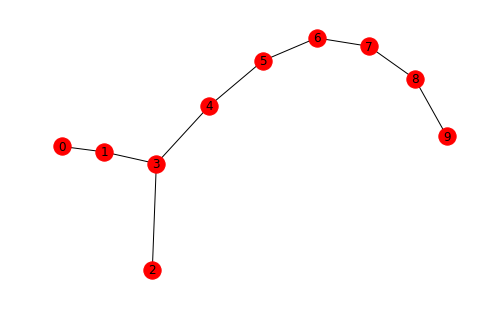

In [53]:
# Draw graph
nx.draw(g, with_labels=True)

In [54]:
shortest = nx.shortest_path(g)

In [55]:
shortest[2][0]

[2, 3, 1, 0]

In [56]:
# Count nodes
g.number_of_nodes() # also g.order()

10

In [57]:
# Count edges
g.number_of_edges() # also g.size()

9

In [58]:
# Degree of a node
g.degree(3)

3

In [59]:
[n for n in g.neighbors(3)]

[1, 2, 4]

Any NetworkX graph behaves like a Python dictionary with nodes as primary keys (only for access!)

In [60]:
g.add_node(0, time='5pm')
g.node[0]['time']

'5pm'

The special edge attribute ’weight’ should always be numeric and holds values used by
algorithms requiring weighted edges. 

In [61]:
g.add_edge(1, 2, weight=4.0)

In [62]:
g[1][2]

{'weight': 4.0}

Many applications require iteration over nodes or over edges: simple and easy in
NetworkX

In [63]:
for node in g.nodes():
    print (node, g.degree(node))

0 1
1 3
2 2
3 3
4 2
5 2
6 2
7 2
8 2
9 1


In [64]:
for edge in g.edges(data=True):
    print (edge)

(0, 1, {})
(1, 2, {'weight': 4.0})
(1, 3, {})
(2, 3, {})
(3, 4, {})
(4, 5, {})
(5, 6, {})
(6, 7, {})
(7, 8, {})
(8, 9, {})


## Diricted Graphs

In [65]:
dg = nx.DiGraph()
dg.add_weighted_edges_from([(1,4,0.5), (3,1,0.75)])

In [66]:
dg.out_degree(1, weight=True)

1

In [67]:
dg.degree(1,weight=True)

2

In [68]:
[n for n in dg.successors(1)]

[4]

In [69]:
[n for n in dg.predecessors(1)]

[3]

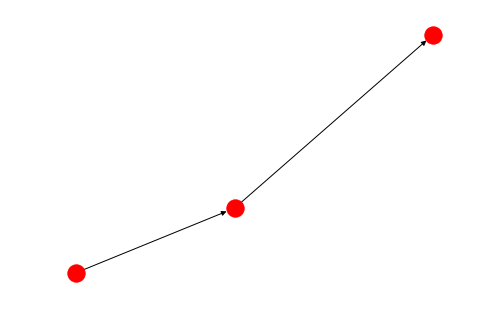

In [70]:
nx.draw(dg)

Some algorithms work only for undirected graphs and others are not well defined for directed graphs.   
To treat a directed graph as undirected for some we should convert it using Graph.to_undirected()

## Retrieving a dataset

In [71]:
# Using an small graph
g = nx.florentine_families_graph()
#g = nx.read_edgelist('../datasets/facebook-anonymized.txt')

In [72]:
nodes, edges = g.order(), g.size()

In [73]:
avg_deg = float(nodes)/edges

In [74]:
print ('Nodes: {}\nEdges: {}\nAvg Degree: {}'.format(nodes, edges, avg_deg) )

Nodes: 15
Edges: 20
Avg Degree: 0.75


## Centrality Measures

In [75]:
def centrality_summary(centrality_output):
    stats = pd.DataFrame([i for i in centrality_output.values()]).describe()
    return stats

**Degree centrality**  
For particular node is the fraction of nodes it is connected to.

In [76]:
degree = nx.degree_centrality(g)

**Closeness centrality**   
For a particular node $u$ is the reciprocal of the sum of the shortest path distances from $u$ to all $n-1$ other nodes. Since the sum of distances depends on the number of nodes in the graph, closeness is normalized by the sum of minimum possible distances $n-1$.  

$C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}$  
where $d(v, u)$ is the shortest-path distance between $v$ and $u$, and $n$ is the number of nodes in the graph.  

Notice that higher values of closeness indicate higher centrality.

In [77]:
closeness = nx.closeness_centrality(g)

**Communicability**   
Between pairs of nodes in G is the sum of closed walks of different lengths starting at node u and ending at node v.   

This algorithm uses a spectral decomposition of the adjacency matrix. Let $G=(V,E)$ be a simple undirected graph. Using the connection between the powers of the adjacency matrix and the number of walks in the graph.  

$C(u,v)=\sum_{j=1}^{n}\phi_{j}(u)\phi_{j}(v)e^{\lambda_{j}}$    
where $\phi_{j}(u)$ is the $u\rm{th}$ element of the $j\rm{th}$ orthonormal eigenvector of the adjacency matrix associated with the eigenvalue $\lambda_{j}$.

In [78]:
communicability = nx.communicability(g)

**Betweenness centrality**   
For a particular node $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$:  

$c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$  
where $V$ is the set of nodes, $\sigma(s, t)$ is the number of shortest $(s, t)$-paths, and $\sigma(s, t|v)$ is the number of those paths passing through some node $v$ other than $(s, t)$. If $(s = t)$, $(\sigma(s, t) = 1)$, and if $(v \in {s, t})$, $(\sigma(s, t|v) = 0)$   

It helps to detect influential nodes  

In [79]:
betweenness = nx.betweenness_centrality(g)

In [80]:
tradeoff = 0.1

In [81]:
highbetw = {key if value > tradeoff else None for key, value in betweenness.items()}
normbetw = {key if value <= tradeoff else None for key, value in betweenness.items()}

In [82]:
subgraphs = [highbetw,normbetw]
colors = ["lightgreen", "lemonchiffon"] #more.. "skyblue", "mistyrose", "aliceblue"]

In [83]:
def find_color(node):
    for subgraph in subgraphs:
        if node in subgraph:
            return colors[subgraphs.index(subgraph)]
    return "ghostwhite"

In [84]:
node_colors = [find_color(node) for node in g.nodes()]

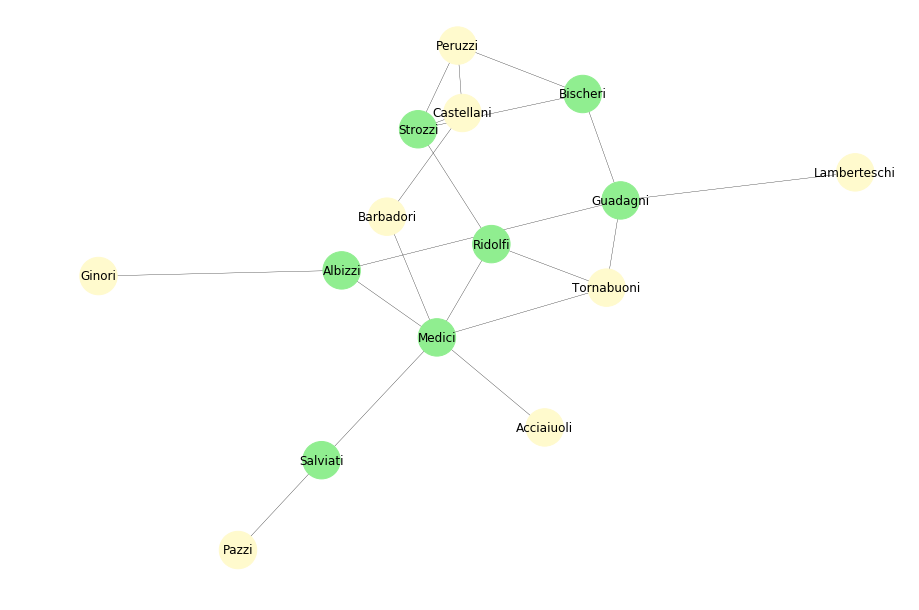

In [85]:
# Render the final figure
plt.figure(figsize=(12, 8))
nx.draw(g, with_labels=True, node_size=1400, node_color=node_colors, width=0.3)

In [86]:
pagerank = nx.pagerank(g, alpha=0.9)

### Graph Properties

As a mathematical object a graph has shape properties by definition

In [87]:
# Create function to retrieve nodes and its degrees
def degree_table(degree_vector):
    d_table = pd.DataFrame()
    nodes, degrees = [], []
    for node, degree in degree_vector:
        nodes.append(node)
        degrees.append(degree)
    
    d_table['nodes'] = nodes
    d_table['degrees'] = degrees
    return d_table

#### Degree Frequency

In [88]:
degrees = degree_table(g.degree()) #also in_degree(), g.out_degree()
plot_degrees = degrees.groupby('degrees').count().head(10)

Text(0,0.5,'Number of nodes')

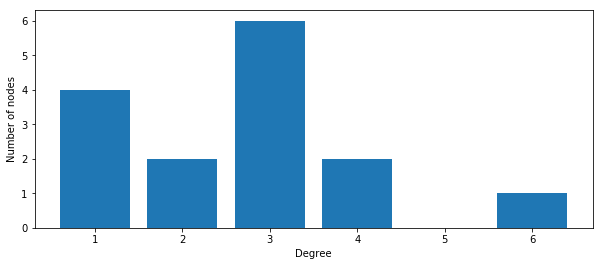

In [89]:
plt.figure(figsize=(10, 4))
plt.bar(plot_degrees.index, plot_degrees['nodes']) # degree
plt.xlabel('Degree')
plt.ylabel('Number of nodes')

**Eccentricity**   
Of a node v is the maximum distance from v to all other nodes in G.

The **diameter** is the maximum eccentricity.

In [90]:
nx.diameter(g)

5

The **radius** is the minimum eccentricity.

In [91]:
nx.radius(g)

3

The **center** is the set of nodes with eccentricity equal to radius.

In [92]:
nx.center(g)

['Tornabuoni', 'Ridolfi', 'Medici', 'Albizzi']

The **dijkstra** method to find the shortest path between two nodes 

In [93]:
dijkstra = nx.dijkstra_path(g,'Barbadori','Lamberteschi')

In [94]:
dijkstra

['Barbadori', 'Medici', 'Tornabuoni', 'Guadagni', 'Lamberteschi']

---

## Small famous graphs

#### To Start With
- nx.petersen_graph()
- nx.tutte_graph()
- nx.sedgewick_maze_graph()
- nx.tetrahedral_graph()
#### Classic graphs
- nx.complete_graph(5)
- nx.complete_bipartite_graph(3,5)
- nx.barbell_graph(10,10)
- nx.lollipop_graph(10,20)
#### Random graphs
- nx.erdos_renyi_graph(50,0.15)
- nx.watts_strogatz_graph(30,3,0.1)
- nx.barabasi_albert_graph(50,5)
- nx.random_lobster(50,0.9,0.9)

*** Pic up one graph and replicate the different metrics ***

*** Choose another drawing layouts ***

- nx.draw()
- nx.draw_random()
- nx.draw_circular()

** Make a network analysis for facebook anonymized data from SNAP using:**  
- nx.read_edgelist('facebook-anonymized.txt')